# clustering analysis with network x

## 1. load the required packages

In [1]:
import networkx as nx
import community as c
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import operator
from pandas import Series,DataFrame
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from node2vec import Node2Vec

## 2. import dataset and obtain the preprocessed data

### 2.1 dataset for 2020

In [2]:
df = pd.read_excel(r'C:\Users\Laptop\anaconda3\envs\kul\kul_mda_barbados\data\all_submission_files.xlsx')
data=df[df["report_end_date"].dt.year==2020]
data.head(n=6)

,report_end_date,cik,nameOfIssuer,titleOfClass,cusip,value,sshPrnamt,sshPrnamtType
0,2020-09-30,1129770,SPDR S&P 500,COM,824348106,70889608,211680,SH
1,2020-09-30,1129770,SPDR Dow Jones Ind,COM,78467x109,29886300,107698,SH
2,2020-09-30,1129770,Ishares Russell,COM,464287622,26825894,143339,SH
3,2020-09-30,1129770,Invesco QQQ TRUST,COM,73935a104,21672909,78005,SH
4,2020-09-30,1129770,iShares Russell 20,COM,464287655,9434973,62988,SH
5,2020-09-30,1129770,SPDR S&P Mid-Cap 4,COM,78464a821,9351708,27600,SH


graph of the data

In [23]:
G=nx.Graph()
for i in df.index:
    edge = df.iloc[i,]
    G.add_edge(edge['cik'],edge['cusip'],weight=edge['value'])

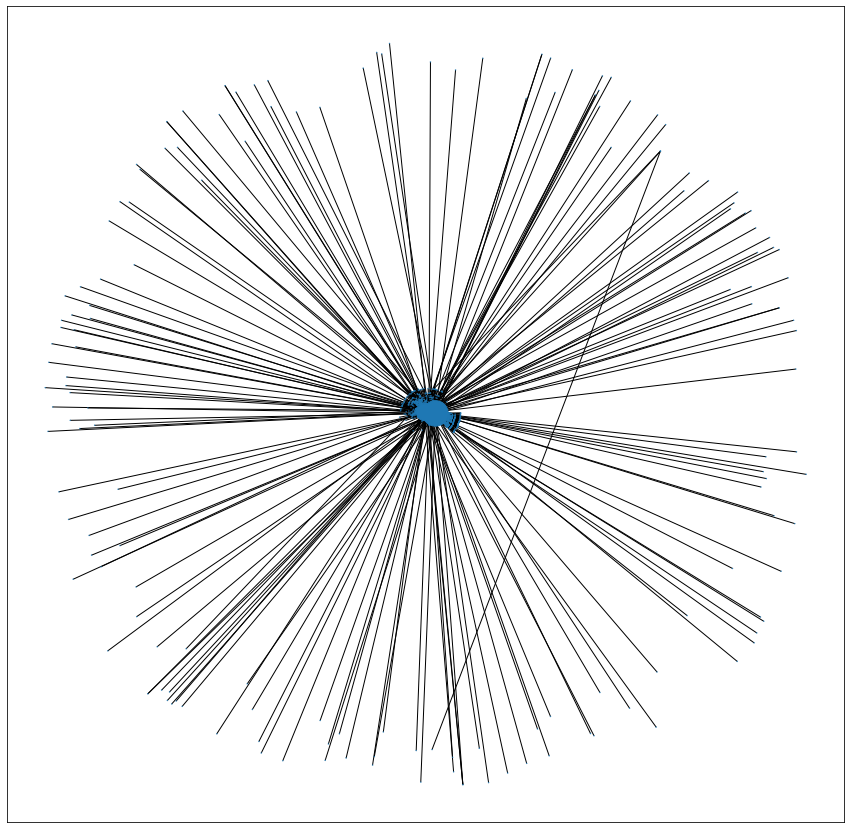

In [24]:
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_size =  [v * 1000 for v in betCent.values()]
#width = [w for w in ]
pos = nx.spring_layout(G)
plt.figure(figsize=(15,15))
nx.draw_networkx(G, 
                 pos=pos, 
                 with_labels=False,
                 node_size=node_size)

In [25]:
df_betweenness = pd.DataFrame.from_dict(betCent,orient='index')
df_betweenness.columns=['betweenness']
df_betweenness.sort_values(by='betweenness',ascending=False,inplace=True)
df_betweenness.head()

,betweenness
932540,0.647953
913414,0.275706
1534270,0.112572
1534468,0.071161
1364615,0.070690


In [26]:
important_nodes = df_betweenness.head(10).index.values
top_tree = important_nodes[0:3]
other_nodes = important_nodes[3:-1]

In [27]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] <= 5 and d['weight']>1)]

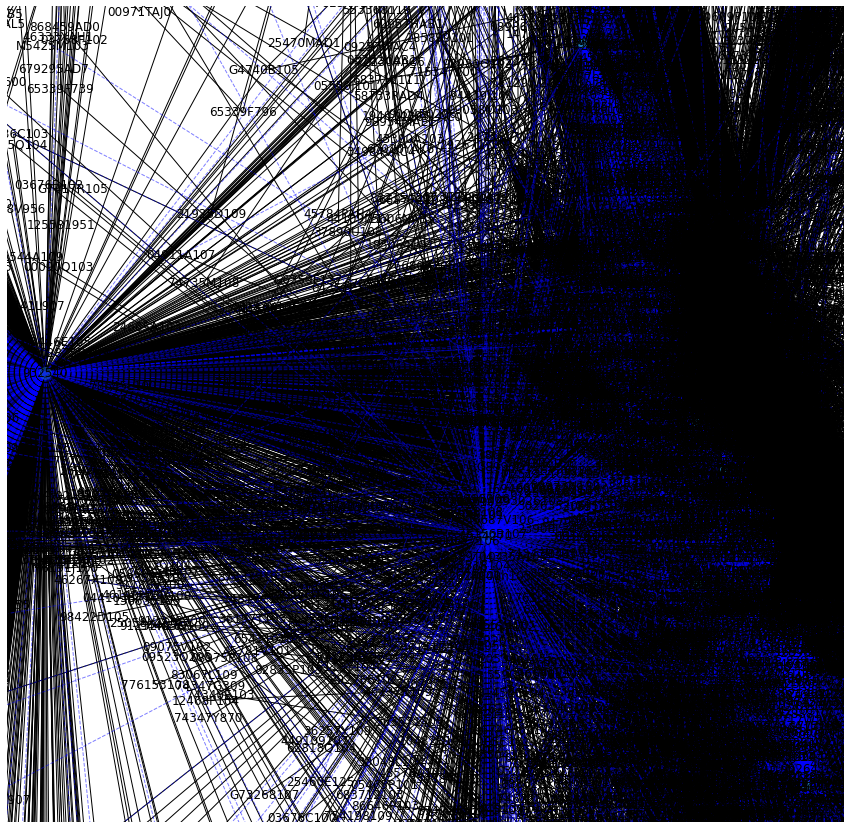

In [28]:
pos = nx.spring_layout(G)  # positions for all nodes
plt.figure(figsize=(15,15))
# nodes
nx.draw_networkx_nodes(G, 
                       nodelist=top_tree,
                       pos=pos, 
                       alpha=0.4,
                       node_size=140)

nx.draw_networkx_nodes(G, 
                       nodelist=other_nodes,
                       pos=pos, node_size=70)

# edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       edgelist=elarge, 
                       width=1)
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       edgelist=esmall, 
                       width=1, alpha=0.5, edge_color="b", style="dashed"
)

# labels
nx.draw_networkx_labels(G, 
                        pos=pos)

plt.axis("off")
plt.show()

In [31]:
df2=df[df["report_end_date"].dt.year==2020]
df2.head()

,report_end_date,cik,nameOfIssuer,titleOfClass,cusip,value,sshPrnamt,sshPrnamtType
0,2020-09-30,1129770,SPDR S&P 500,COM,824348106,70889608,211680,SH
1,2020-09-30,1129770,SPDR Dow Jones Ind,COM,78467x109,29886300,107698,SH
2,2020-09-30,1129770,Ishares Russell,COM,464287622,26825894,143339,SH
3,2020-09-30,1129770,Invesco QQQ TRUST,COM,73935a104,21672909,78005,SH
4,2020-09-30,1129770,iShares Russell 20,COM,464287655,9434973,62988,SH


In [33]:
G=nx.Graph()
for i in df2.index:
    edge = df.iloc[i,]
    G.add_edge(edge['cik'],edge['cusip'],weight=edge['value'])

In [46]:
G = nx.complete_graph(5)
for i in df2.index:
    edge = df.iloc[i,]
    G.add_edge(edge['cik'],edge['cusip'],weight=edge['value'])
print(nx.clustering(G))

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 1129770: 0, '824348106': 0, '78467x109': 0, '464287622': 0, '73935a104': 0, '464287655': 0, '78464a821': 0, '023135106': 0, '78464a888': 0, '153501101': 0, '00430h105': 0, '464287648': 0, '81369y704': 0, '922908751': 0, '437076102': 0, '70450y103': 0, '29444u502': 0, '808524300': 0, '78464a797': 0, '922908769': 0, '037833100': 0, '922042858': 0, '72201r833': 0, '020002101': 0, '594918104': 0, '921078101': 0, '872540109': 0, '922908736': 0, 1733510: 0, '464287804': 0, '464287200': 0, '464287739': 0, '78462F103': 0, '110122108': 0, '291011104': 0, '097023105': 0, '46090E103': 0, '031162100': 0, '002824100': 0, '007903107': 0, '02209S103': 0, '458140100': 0, '452308109': 0, '68389X105': 0, '254687106': 0, '816851109': 0, '478160104': 0, '717081103': 0, '166764100': 0, '911312106': 0, '00206R102': 0, '17275R102': 0, '459200101': 0, '191216100': 0, '539830109': 0, '713448108': 0, '92343V104': 0, '78464A409': 0, '464287481': 0, '81369Y803': 0, '244199

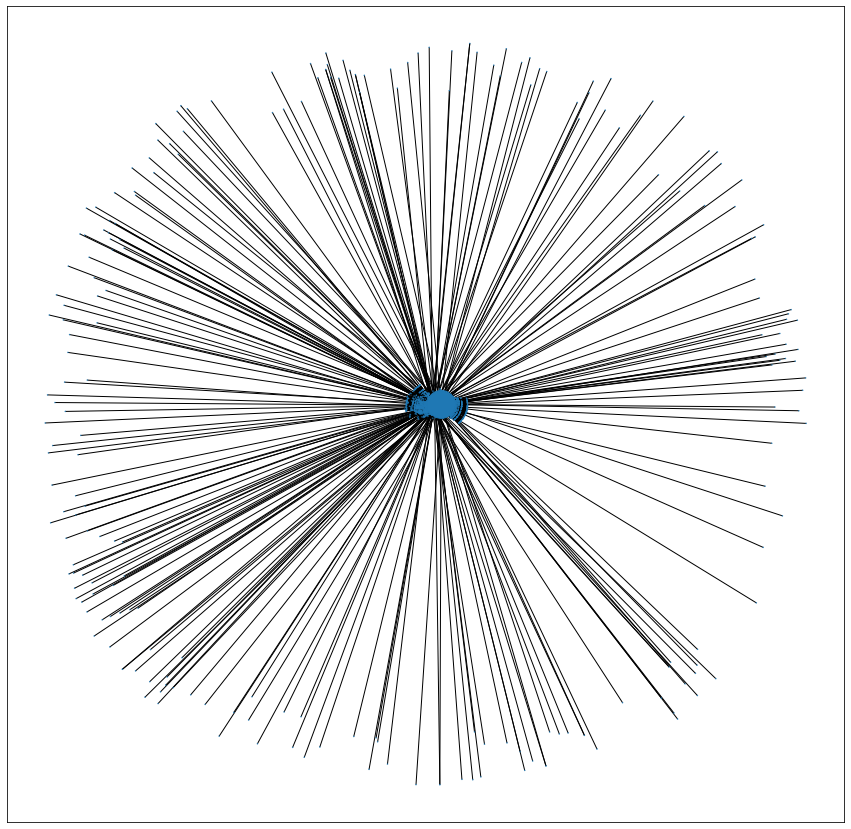

In [34]:
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_size =  [v * 1000 for v in betCent.values()]
#width = [w for w in ]
pos = nx.spring_layout(G)
plt.figure(figsize=(15,15))
nx.draw_networkx(G, 
                 pos=pos, 
                 with_labels=False,
                 node_size=node_size)

In [36]:
df2_betweenness = pd.DataFrame.from_dict(betCent,orient='index')
df2_betweenness.columns=['betweenness']
df2_betweenness.sort_values(by='betweenness',ascending=False,inplace=True)
df2_betweenness.head()

,betweenness
932540,0.775642
1534270,0.191855
1344551,0.103414
1534468,0.075055
1729254,0.042361


In [37]:
important_nodes = df2_betweenness.head(10).index.values
top_tree = important_nodes[0:3]
other_nodes = important_nodes[3:-1]

In [38]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] <= 5 and d['weight']>1)]

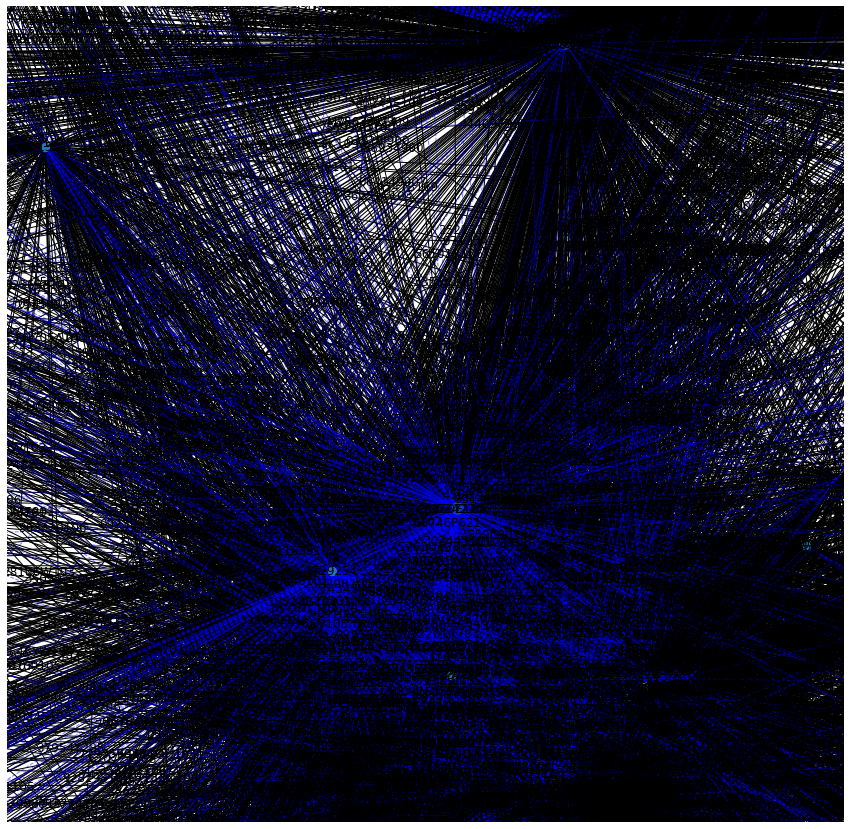

In [39]:
pos = nx.spring_layout(G)  # positions for all nodes
plt.figure(figsize=(15,15))
# nodes
nx.draw_networkx_nodes(G, 
                       nodelist=top_tree,
                       pos=pos, 
                       alpha=0.4,
                       node_size=140)

nx.draw_networkx_nodes(G, 
                       nodelist=other_nodes,
                       pos=pos, node_size=70)

# edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       edgelist=elarge, 
                       width=1)
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       edgelist=esmall, 
                       width=1, alpha=0.5, edge_color="b", style="dashed"
)

# labels
nx.draw_networkx_labels(G, 
                        pos=pos)

plt.axis("off")
plt.show()

### 2.2 summary of the dataset

In [ ]:
Retrieve the number of stock and total amount of investment in stocks for each company during 2020

In [18]:
data_summary = data.groupby('cik').agg({'value': ['sum', 'count']})
index_name = data_summary.index
total_value = []
number_stocks = []
for i in range(0, len(data_summary)):
  total_value.append(data_summary.values[i, 0])
  number_stocks.append(data_summary.values[i, 1])
data_final = {'cik':index_name,'number_stocks': number_stocks, 'total_value': total_value}
data_final = DataFrame(data_final)
data_final = data_final.drop(data_final[data_final['total_value']==0].index)
data_final.head(n=6)

,cik,number_stocks,total_value
0,732847,80,248377
1,750641,623,2192576
2,819535,86,777300
3,883790,168,639939
4,903944,79,2885946
5,911270,49,941165


### 2.3 adjust the scale of the data

Take the logarithmic transformation of the total value and number of stocks.

In [19]:
data_log = data_final.copy()
data_log['number_stocks'] = numpy.log(data_log['number_stocks'])
data_log['total_value'] = numpy.log(data_log['total_value'])
data_log.head(n=6)

,cik,number_stocks,total_value
0,732847,4.382027,12.422703
1,750641,6.434547,14.600588
2,819535,4.454347,13.563582
3,883790,5.123964,13.369128
4,903944,4.369448,14.875363
5,911270,3.891820,13.754874


## 3. visualize the data

### 3.1 plot the transformed dataset

<Figure size 864x936 with 0 Axes>

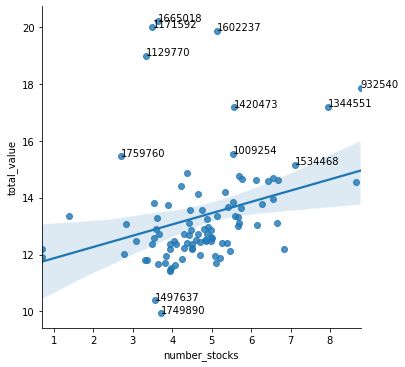

In [20]:
data_label= data_log[(data_log.total_value>15)|(data_log.total_value<11)]
fig=plt.figure(figsize=(12, 13))
sns.lmplot(x='number_stocks',y='total_value',data=data_log,fit_reg=True) 
for i in range (len(data_label)):
    plt.annotate(data_label['cik'].iloc[i],(data_label['number_stocks'].iloc[i],data_label['total_value'].iloc[i]))

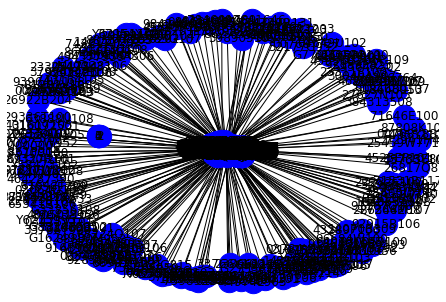

In [47]:
nx.draw(G,with_labels=True, node_color='b',node_size=500)

In [52]:
node2vec= Node2Vec(G, dimensions=2, walk_length=20, num_walks=10,workers=4)
model=node2vec.fit(window=10, min_count=1)
model.wv.most_similar('1')
model.wv.save_word2vec_format("netwerk")